# Assignment 08

#### 1. import data from "mnist_test.csv"

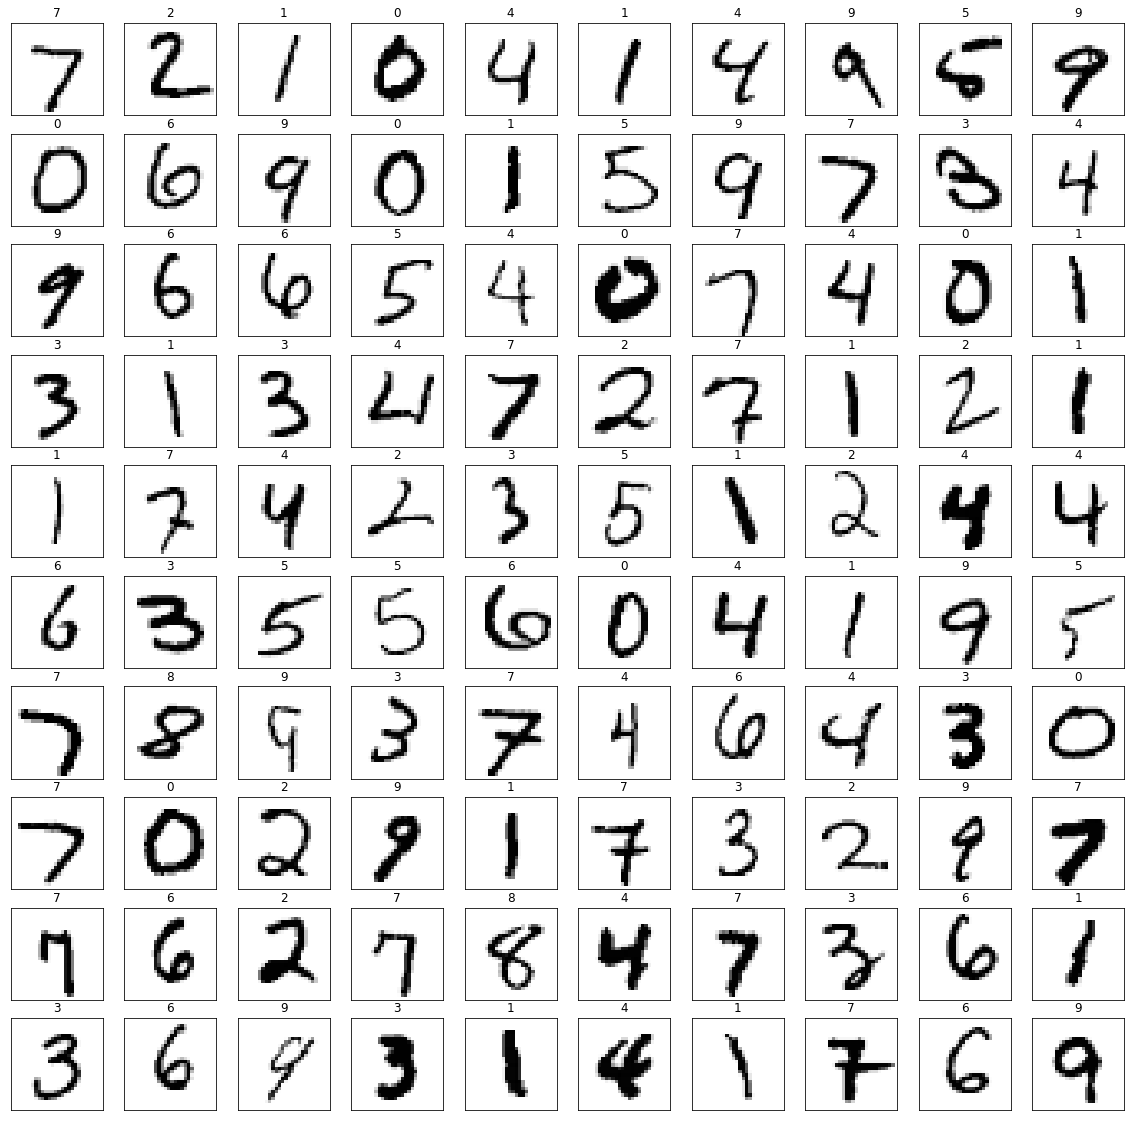

In [1]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

# make a matrix each column of which represents an images in a vector form
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1


# plot first 100 images out of 10,000 with their labels
f1 = plt.figure(figsize=(20, 20))

for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

#### 2. Get the average of input image and plot

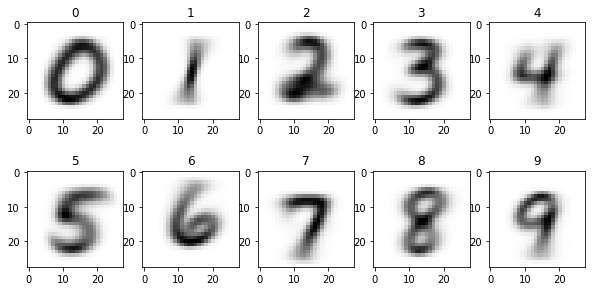

In [2]:
col_avg = []

for j in range(10):
    increase = 0
    tol = 0
    count = 0
    for i in range(10000):
        if list_label[i] == j:
            tol += list_image[:,i]
            count += 1
    
    col_avg.append(tol/count)


plt.figure(figsize=(10, 5))
for i in range(10):
    im_vector   = col_avg[i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    plt.subplot(2, 5, i + 1)
    plt.title(i)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')
plt.show()

#### 3. Define a logistic function 
$z=\frac{1}{1+e^{-\omega^{T}\cdot x}}$

In [3]:
def logistic_unit(x,w):
    y = x.dot(w)
    return 1/(1 + np.exp(-y))

print('Defined logistic unit function!')


Defined logistic unit function!


#### 4. Classify the data by labels

In [4]:
label_image = [[],[],[],[],[],[],[],[],[],[]]
for i in range(10000):
    for j in range(10):
        if list_label[i] == j:
            label_image[j].append(list_image[:,i])
            
print("Data classified by label!")

Data classified by label!


#### 5. Compute the forward propagate and plot

c:\users\ains-sengly\github\venv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


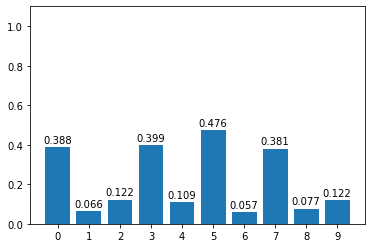

In [5]:
col_logistic = [[],[],[],[],[],[],[],[],[],[]]
w = np.random.normal(loc=0, scale=1, size=[784,1])

for j in range(10):

    for i in range(len(label_image[j])):
    
        x = np.array(label_image[j][i])
        z = logistic_unit(x,w)
        col_logistic[j].append(z)

col_avg_log = []
for j in range(10):
    col_avg_log.append(np.average(np.array(col_logistic[j])))
    # print('%.4f' %aa)

plt.bar(['0','1','2','3','4','5','6','7','8','9'],col_avg_log)
for index, value in enumerate(col_avg_log):
    plt.text(index - 0.48, value + 0.02 , "%.3f" % value)
plt.ylim([0,1.1])
plt.show()